In [2]:
import numpy as np
import pandas as pd

**Table of contents**<a id='toc0_'></a>    
- [Self-guided: Data Viz libraries](#toc1_)    
  - [Matplotlib](#toc1_1_)    
  - [Seaborn](#toc1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Self-guided: Data Viz libraries](#toc0_)

## <a id='toc1_1_'></a>[Matplotlib](#toc0_)

> `matplotlib.pyplot` is a package designed to do visual data analytics in 2D, built on top of `numpy`. Originally conceived for scientific computation, not presentation.

Documentation: https://matplotlib.org/stable/index.html

In [3]:
import matplotlib.pyplot as plt

Matplotlib can do plots and subplots directly using `plt.plot()` and `plt.subplots()`:

In [ ]:
plt.plot([1, 2, 3, 4, 5], [7, 6, 9, 5, 3])

To remove the ugly coordinate at the beginning (`[<matplotlib.lines.Line2D at 0x2691b3e0280>]`) we simply add `plt.show()` after we do the plot. This is recommended to ensure you show your plots.

In [ ]:
plt.plot([1, 2, 3, 4, 5], [7, 6, 9, 5, 3])
plt.show()

The alternative to showing our figure in the notebook is to save it as a `png` file to our computer:

In [ ]:
plt.plot([1, 2, 3, 4, 5], [7, 6, 9, 5, 3])
plt.savefig('lineplot.png')

You'll see now you have saved a file called `lineplot.png` in the same folder as your Jupyter notebook, hooray!

We can customize our plot a bit more:

In [ ]:
# Show blue (b) circles (o)
plt.plot([1, 2, 3, 4, 5], [7, 6, 5, 4, 3], 'bo')
plt.show()

In [ ]:
# Show red (r) plus markers (+) on a straight line (-)
plt.plot([1,2,3,4,5],[5,4,3,2,1],'r-')
plt.show()

There are many more types of points and lines you can use in matplotlib, which you can find [here](https://matplotlib.org/stable/api/markers_api.html).

We can also add titles to the X and Y axis and the chart as a whole:

In [ ]:
plt.plot([1,2,3,4,5],[5,4,3,2,1],'b*-')
plt.ylabel("Attention span")
plt.xlabel("Number of mentions of statistics")
plt.title('Very Important Chart')
plt.show()

*Note:* When using `plt.plot()`, `matplotlib` remembers all of the charts you did until you get to `plt.show()`:

In [ ]:
plt.plot([1, 2, 3, 4, 5], [7, 6, 9, 5, 3])
plt.plot([1, 2, 3, 4, 5], [7, 6, 5, 4, 3],'bo')
plt.plot([1, 2, 3, 4, 5], [5, 4, 3, 2, 1],'r+-')
plt.ylabel("Attention span")
plt.xlabel("Number of mentions of statistics")
plt.title('Very Important Chart')
plt.show()

`Matplotlib` is so customizable you can easily choose what numbers to show on the x and y axis:

In [ ]:
x = np.array([1, 2, 3.5, 4, 5])
y = np.square(x)
plt.xticks(np.arange(-3, 4))
plt.yticks(np.arange(y.min(), y.max(), 5))
plt.plot(x, y, 'ro-')
plt.show()

We can also plot multiple things at once:

In [ ]:
# First range has red (r) circles (o) and the second has green (g) triangles (^)
plt.plot([1, 2, 3, 4, 5], [5, 4, 3, 2, 1], "ro", [1, 2, 3, 4, 5], [3, 6, 7, 2, 0], "g^")
plt.show()

If you think it couldn't get any cooler, you can also directly write mathematical formulas inside your plot:

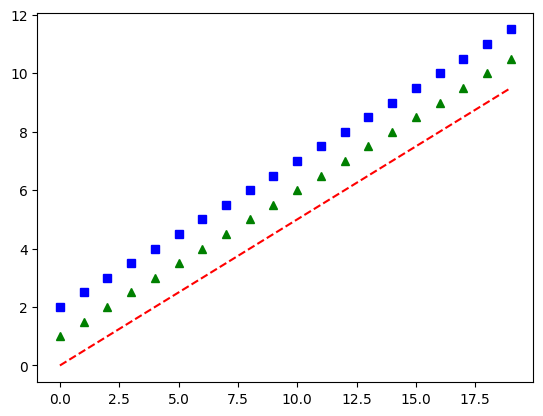

In [4]:
# Range 1: red (r) dotted line (--)
# Range 2: green (r) triangles (^)
# Range 3: blue (b) squares (s)
x = np.arange(0, 20)
y = np.arange(0, 10, 0.5)
plt.plot(x, y, 'r--', x, y + 1, 'g^', x, y + 2, 'bs')
plt.show()

Now, you can organize all of your `plt.plot()` functions in multiple axes (`ax`) in one figure (`fig`):

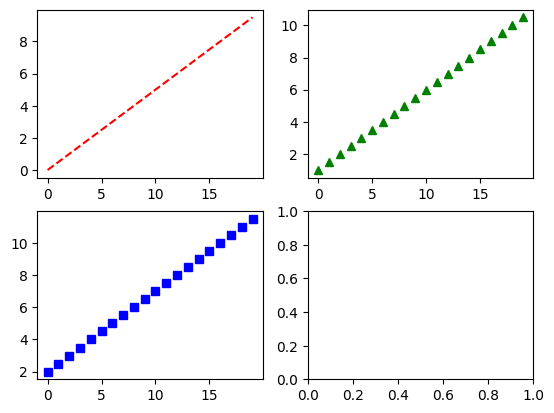

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0, 0].plot(x, y, 'r--')
ax[0, 1].plot(x, y + 1, 'g^')
ax[1, 0].plot(x, y + 2, 'bs')
plt.show()

You can notice that instead of using `plt.plot()` to add all of our lines in the same figure, we created a plot for each of the axes by using `ax[row, col].plot()` instead! There are many more options to play with and you can have a look through the [intermediate tutorials](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html) to get an idea of what you can do!

Below are the main options you have to customize your figure (`fig`) and axes (`ax`):

![anatomy of a figure](https://matplotlib.org/stable/_images/anatomy.png)

How can we use subplots for a real application?

In [ ]:
# Let's look at a new dataset
sales = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/supermarket_sales.csv')
sales.head()

*Note:* COGS = cost of goods sold, i.e. how much it cost to make a product

In [ ]:
# We create 3 charts directly
plot_options, (chart_1, chart_2, chart_3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))

subcat_total_profit = sales.groupby('Product line').agg({'Total':'sum'}).reset_index()
subcat_total_sales = sales.groupby('Product line').agg({'cogs':'sum'}).reset_index()
subcat_total_quantity = sales.groupby('Product line').agg({'Quantity':'sum'}).reset_index()

# We add bar plots in each of the charts
chart_1.bar(subcat_total_profit['Product line'], subcat_total_profit['Total'])
chart_2.bar(subcat_total_sales['Product line'], subcat_total_sales['cogs'])
chart_3.bar(subcat_total_quantity['Product line'], subcat_total_quantity['Quantity'])

plt.show()

## 💡 Your turn!

Plot the tax and gross income per product line side by side using subplots and aggregations like in the previous example. Is the tax higher than the gross income in any of the product lines?

In [ ]:
# Your code here
# We create 3 charts directly
plot_options, (chart_1, chart_2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

subcat_total_profit = sales.groupby('Product line').agg({'Tax 5%':'sum'}).reset_index()
subcat_total_sales = sales.groupby('Product line').agg({'gross income':'sum'}).reset_index()

# We add bar plots in each of the charts
chart_1.bar(subcat_total_profit['Product line'], subcat_total_profit['Tax 5%'])
chart_2.bar(subcat_total_sales['Product line'], subcat_total_sales['gross income'])

plt.show()

What do you notice? Does this seem right? If not, do send your suspicion on why that could be to the Lead Teacher 😉

## Matplotlib + Pandas

You can also plot directly using a pandas dataframe:

In [ ]:
subcat_profit_sales = sales.groupby('Product line').agg({'Total': 'sum', 'cogs': 'sum'})
subcat_profit_sales.plot(kind = 'bar', figsize = (50, 15))
# plt.xticks(fontsize=24, rotation=0)
# plt.yticks(fontsize=24, rotation=0)
# plt.legend(fontsize=24)
plt.show()

In [ ]:
# subplots - materialized

plot_options, (chart_1, chart_2, chart_3) = plt.subplots(nrows = 3, ncols = 1, figsize = (20,10))

subcat_total_profit = sales.groupby('Product line').agg({'Total':'sum'}).reset_index()
subcat_total_sales = sales.groupby('Product line').agg({'cogs':'sum'}).reset_index()
subcat_total_quantity = sales.groupby('Product line').agg({'Quantity':'sum'}).reset_index()

chart_1.bar(subcat_total_profit['Product line'], subcat_total_profit['Total'])
chart_2.bar(subcat_total_sales['Product line'], subcat_total_sales['cogs'])
chart_3.bar(subcat_total_quantity['Product line'], subcat_total_quantity['Quantity'])

plt.show()

## <a id='toc1_2_'></a>[Seaborn](#toc0_)

Documentation: https://seaborn.pydata.org/

> `seaborn` is a more modern "add-on", with extensive `pandas` integration and a somewhat updated pallete and viduals, but still ugly IMHO

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

Let's start with a harmless box plot with a prettier format than matplotlib:

In [ ]:
sns.boxplot(x='Product line', y='Quantity', data=sales)

Seaborn is built on top of matplotlib, so you can use functions and methods from matplotlib with seaborn. Now we will fix the labels on the x-axis:

In [ ]:
sns.boxplot(x='Product line', y='Quantity', data=sales)
plt.xticks(rotation=45)

### 💡 Your turn!

- What do you notice about the sales across product lines?

Your answer here

- Can you have a look at the Unit Price variation across product lines? What do you see?

In [ ]:
# Your code here

Now let's have a look at 2 different plots painting a similar picture to the boxplot:

In [ ]:
# First plot = swarmplot
sns.catplot(x='Product line', y='Total', hue='Gender', data=sales)
plt.xticks(rotation=45)

# Second plot = violin plot
sns.catplot(x='Product line', y='Total', hue='Gender', data=sales, kind='violin')
plt.xticks(rotation=45)
plt.show()

We notice a couple of things:
- When we use `sns.plot()`, plots appear separately. In `matplotlib` using multiple `plt.plot()` one after another put everything in the same plot.
- The **swarmplot** is basically a scatterplot in a single line. It can be useful if we want to see **data density** but typically, a histogram will be better.
- The **violin plot** is a combo between a box plot and a histogram. The reality is that it's quite difficult to read, even if it looks pretty so you won't use it much in practice.

Both these plots look cool and have their use but try not to use them with people that don't speak data. You will confuse them!

### 💥 The atomic bomb of plotting: the pairplot

This plot can be useful for finding correlations and we will show it in the next lecture also. In the meantime, I hope you're able to see why it's an atomic bomb (it will take a while to load, no worries).

In [ ]:
sns.pairplot(sales)

Let's make it even more atomic by colouring the different products:

In [ ]:
sns.pairplot(sales, hue='Product line')

# Resources

You can have a look at a lot of types of seaborn plots either in [data-to-viz](https://www.data-to-viz.com/) or the [Seaborn example gallery](https://seaborn.pydata.org/examples/index.html).